Nama : Ansgarius Pangestu Adjie

NIM : 18/430183/PA/18696

Mata Kuliah : Biosistem


 1.  Pada nomor 1 untuk uts kali ini kita diminta untuk membuat implementasi fuzzy pada kasus nyata. disini saya megambil kasus untuk produksi roti. Parameter yang digunakan adalah permintaan, persediaan, dan produksi. memberhsip dan range untuk ke tiga parameter dapat dilihat pada tabel

  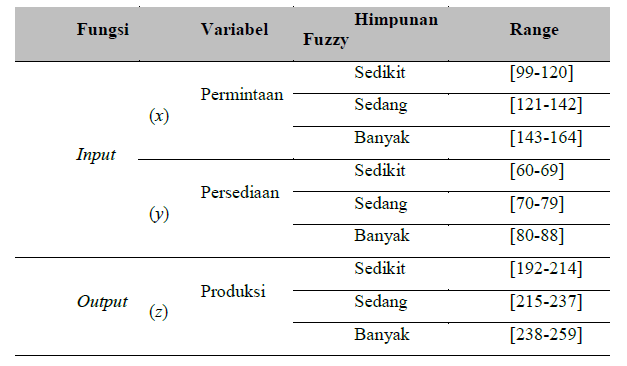



untuk tabel fuzzy interference system dapat dilihat pada tabel

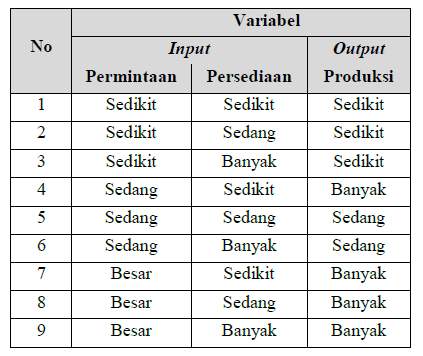



Output produksi diubah 

Sedikit = Minimal

Sedang = Normal

Banyak = Maksimal

jenis diagram atau bentuk output yang digunakan adalah segitiga dan trapesium

Sampel data Produk

In [ ]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

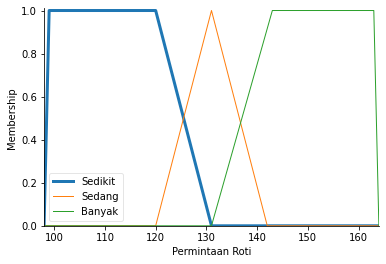

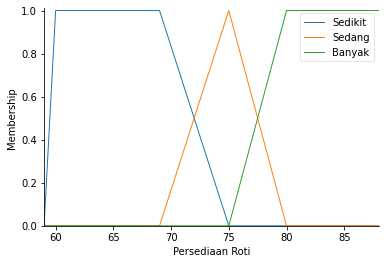

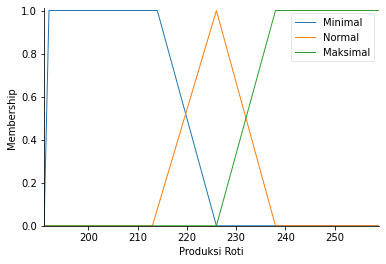

In [ ]:
permintaan = ctrl.Antecedent(np.arange(98, 165, 1),'Permintaan Roti')
persediaan = ctrl.Antecedent(np.arange(59, 89, 1), 'Persediaan Roti')
produksi = ctrl.Consequent(np.arange(191, 260, 1), 'Produksi Roti')
#untuk trapesium (nilai awal, nilai atas awal, nilai atas akhir, akhir)
#untuk segitiga (nilai awal, nilai puncak, nilai akhir)
#Permintaan
permintaan['Sedikit'] = fuzzy.trapmf(permintaan.universe,(99,99,120,131))
permintaan['Sedang'] = fuzzy.trimf(permintaan.universe,(120,131,142))
permintaan['Banyak'] = fuzzy.trapmf(permintaan.universe,(131,143,163,163))

#Persediaan
persediaan['Sedikit'] = fuzzy.trapmf(persediaan.universe,(60,60,69,75))
persediaan['Sedang'] =  fuzzy.trimf(persediaan.universe,(69,75,80))
persediaan['Banyak'] =  fuzzy.trapmf(persediaan.universe,(75,80,88,88))

#Produksi
produksi['Minimal'] = fuzzy.trapmf(produksi.universe,(192,192,214,226))
produksi['Normal'] = fuzzy.trimf(produksi.universe,(213,226,238))
produksi['Maksimal'] = fuzzy.trapmf(produksi.universe,(226,238,259,259))

#Universe digunakan sebagai himpunan semesta bagi range untuk permintaan persediaan dan produksi
#product view digunakan untuk melihat isi
permintaan['Sedikit'].view()
persediaan.view()
produksi.view()

#Rule diambil dari Fuzzy Interference System
#rule berisi "jika a dan b maka c"
rule1 = ctrl.Rule(permintaan['Sedikit']&persediaan['Sedikit'],produksi['Minimal'])
rule2 = ctrl.Rule(permintaan['Sedikit']&persediaan['Sedang'],produksi['Minimal'])
rule3 = ctrl.Rule(permintaan['Sedikit']&persediaan['Banyak'],produksi['Minimal'])
rule4 = ctrl.Rule(permintaan['Sedang']&persediaan['Sedikit'],produksi['Maksimal'])
rule5 = ctrl.Rule(permintaan['Sedikit']&persediaan['Sedang'],produksi['Normal'])
rule6 = ctrl.Rule(permintaan['Sedang']&persediaan['Banyak'],produksi['Normal'])
rule7 = ctrl.Rule(permintaan['Banyak']&persediaan['Sedikit'],produksi['Maksimal'])
rule8 = ctrl.Rule(permintaan['Banyak']&persediaan['Sedikit'],produksi['Maksimal'])
rule9 = ctrl.Rule(permintaan['Banyak']&persediaan['Banyak'],produksi['Maksimal'])

product_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
product = ctrl.ControlSystemSimulation(product_ctrl)

Jumlah Permintaan (99-164) : 120
Jumlah Persediaan (60-88) : 75
211.28615227388866


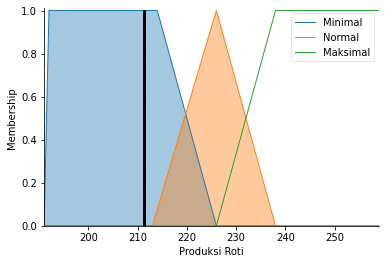

In [ ]:
A = float(input("Jumlah Permintaan (99-164) : "))
B = float(input("Jumlah Persediaan (60-88) : "))

if (A>164) or (B>88) or (A<99) or (B<60) : 
  print("Range yang dimasukan diluar ketentuan")
else:
  product.input['Permintaan Roti'] = A
  product.input['Persediaan Roti'] = B

  product.compute()
  
  print(product.output['Produksi Roti'])
  produksi.view(sim=product)



2. Implementasi ACU dan penjelasannya

In [ ]:
from random import Random #random data yang digunakan (membuat data menjadi random)
from time import time
import math
import inspyred #merupakan library untuk memecahkan permasalahan komputasi yang spesifik

def main(prng=None, display=False):    
    if prng is None:
        prng = Random()
        prng.seed(time()) 
        
    points = [(110.0, 225.0), (161.0, 280.0), (325.0, 554.0), (490.0, 285.0), 
              (157.0, 443.0), (283.0, 379.0), (397.0, 566.0), (306.0, 360.0), 
              (343.0, 110.0), (552.0, 199.0)]
    weights = [[0 for _ in range(len(points))] for _ in range(len(points))]
    for i, p in enumerate(points): #counter ke iterable
        for j, q in enumerate(points): #counter ke iterable
            weights[i][j] = math.sqrt((p[0] - q[0])**2 + (p[1] - q[1])**2)
              
    problem = inspyred.benchmarks.TSP(weights)
    ac = inspyred.swarm.ACS(prng, problem.components)
    ac.terminator = inspyred.ec.terminators.generation_termination
    final_pop = ac.evolve(generator=problem.constructor, 
                          evaluator=problem.evaluator, 
                          bounder=problem.bounder,
                          maximize=problem.maximize, 
                          pop_size=10, 
                          max_generations=50)
    
    if display:
        best = max(ac.archive)
        print('Best Solution:')
        for b in best.candidate:
            print(points[b.element[0]])
        print(points[best.candidate[-1].element[1]])
        print('Distance: {0}'.format(1/best.fitness))
    return ac
            
if __name__ == '__main__':
    main(display=True)

Best Solution:
(306.0, 360.0)
(283.0, 379.0)
(397.0, 566.0)
(325.0, 554.0)
(157.0, 443.0)
(161.0, 280.0)
(110.0, 225.0)
(343.0, 110.0)
(552.0, 199.0)
(490.0, 285.0)
Distance: 1552.9612081934351


tiap ant dimulai dari nodes yang random, kemudian ant akan bergerak ke tiap nodes untuk mengisi memori yang kosong. poin yang ditentukan dalam pergerakan sudah ditentukan dalam sebuah matriks. hasil akhir terbaik yang didapatkan untuk ant bergerak ke nodes yang kosong didapatkan pada "Best Solution" dengan distancenya 1552.9612